Enter a date between the dates 10/31/2020 and 10/31/2025 for an estimate of the natrual gas price on that day
Enter year: 2022
Enter a month: 2
Enter a day: 2


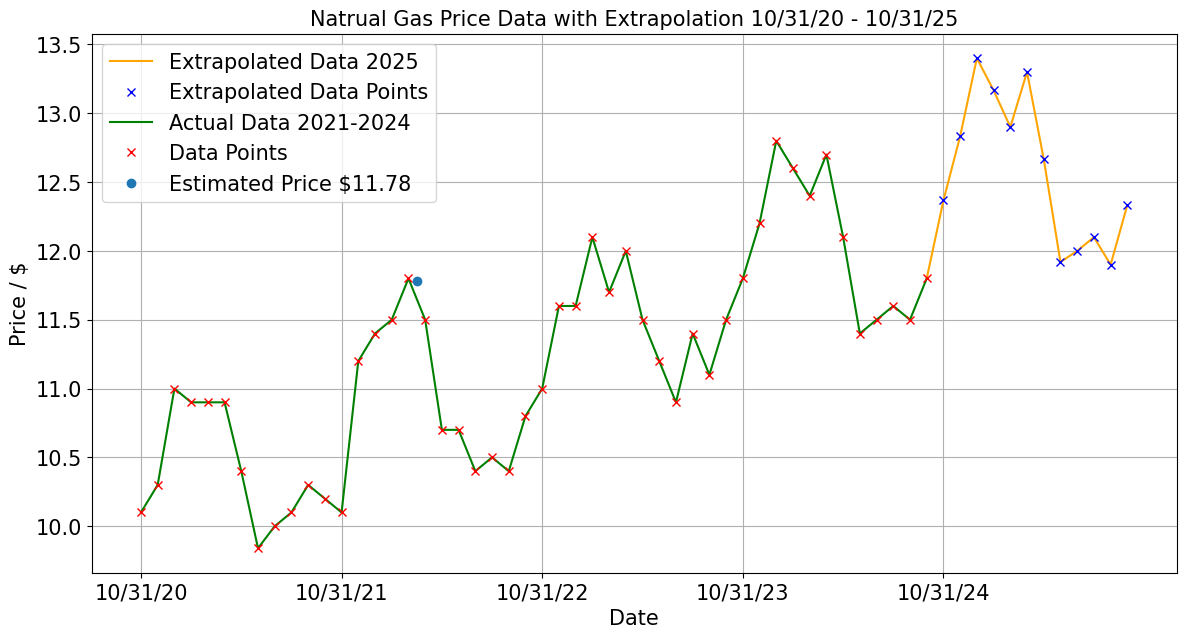

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#function that takes a integer inputs for dates in the format MM,DD,YYYY and outputs a price
def natGasPrice(find):
    lower = allprices[find]
    upper = allprices[find + 1]
    return np.interp(day, [0, 30.5], [lower, upper])#30.5 average days per month

#function to make code less messy but still messy
def findDate(month, day, year):
    find = 0
    for i in range(year - 2021):
        find += 12
    for i in range(month):
        find += 1
    if year == 2020:
        if month == 10:
            return 0
        elif month == 11:
            return 1
        else:
            return 2
    return find + 2

while True:
    print("Enter a date between the dates 10/31/2020 and 10/31/2025 for an estimate of the natrual gas price on that day")
    year = int(input("Enter year: "))
    month = int(input("Enter a month: "))
    day = int(input("Enter a day: "))
    if year == 2020: #stop invalid input when year is 2020 or 2025
        if month < 10 or month > 12 or day < 1 or day > 31:
            print("\nInput not valid\n")
    elif year == 2025:
        if month > 10 or month < 1 or day < 1 or day > 31:
            print("\nInput not valid\n")
    elif year > 2025 or year < 2020 or month < 1 or month > 12 or day > 31 or day < 1: #stop invalid input
            print("\nInput not valid\n")
    else:
        break

ws = pd.read_csv("/Nat_Gas.csv")


dates = []
prices = []

for col in ws['Dates'].values:
    dates.append(col)


for col in ws['Prices'].values:
    prices.append(col)


col = 0
row = 0
larray = np.zeros((12,4))#12 months 4 years of data

#sorting data into months
for int, price in enumerate(prices):
    if row == 12:
        row = 0
        col += 1
    larray[row][col] = price
    row += 1

#finding average rise each year in specific months
avgmonth = np.zeros((12,3))
avg = []
for i in range(12):
    for j in range(3):
        avgmonth[i][j] = larray[i][3-j] - larray[i][2-j]

#avg change per month over the 4 years
extprices = prices[-12:]
for i in range(12):
    extprices[i] += (avgmonth[i][0]+avgmonth[i][1]+avgmonth[i][2])/3

allprices = prices + extprices
foundDate = findDate(month, day, year)
chosen = round(natGasPrice(foundDate), 2)

# for visualisation
plt.figure(figsize=[14, 7])
plt.title("Natrual Gas Price Data with Extrapolation 10/31/20 - 10/31/25", fontsize = 15)

#extrapolated data
plt.plot(np.arange(len(dates), len(dates)+12, 1), extprices, color = 'orange', label = 'Extrapolated Data 2025')
plt.plot([len(dates)-1, len(dates)], [prices[-1], extprices[0]], color = 'orange')
plt.plot(np.arange(len(dates), len(dates)+12, 1), extprices, color = 'blue', marker = 'x', linestyle = 'none', label = 'Extrapolated Data Points')

#gas price data
plt.plot(dates, prices, label = 'Actual Data 2021-2024', color = 'green')
plt.plot(dates, prices, 'x', color = 'red', label = 'Data Points ')

#chosen date
plt.plot(foundDate + 0.5, chosen, 'o', label = 'Estimated Price $' + str(chosen))
dates += ["10/31/24"]

plt.xlabel('Date', fontsize = 15)
plt.ylabel('Price / $', fontsize = 15)
plt.xticks(dates[::12])
plt.tick_params('both', labelsize = 15)
plt.grid()
plt.legend(fontsize = 15)

plt.show()